# Day 11: Define Augmentation Procedures

**Selected Augmentation Procedures:**

- **Brightness and Contrast Adjustment**  
  *Description:* Modifies the overall intensity and the difference between light and dark areas in the image. This simulates varying lighting conditions.

- **Gaussian Noise Addition**  
  *Description:* Adds random noise following a Gaussian distribution to pixel values. This simulates sensor noise, which is common in low-light environments or with lower quality cameras.


--- Testing Augmentations on a Dummy Image ---


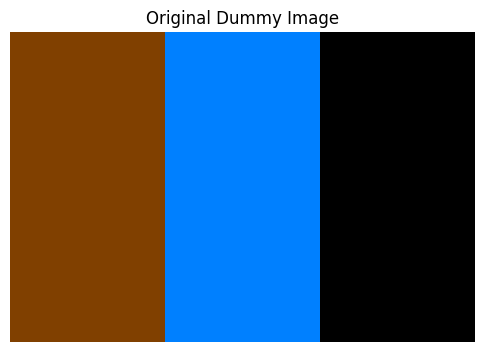

Applied Brightness/Contrast: alpha=1.0, beta=50


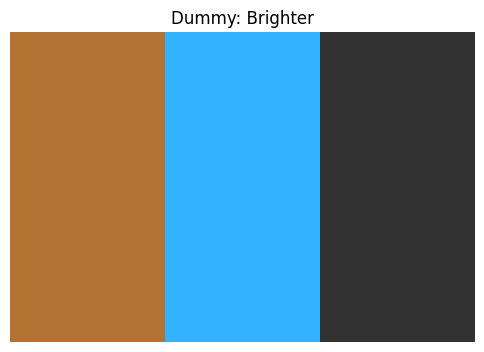

Applied Brightness/Contrast: alpha=1.5, beta=0


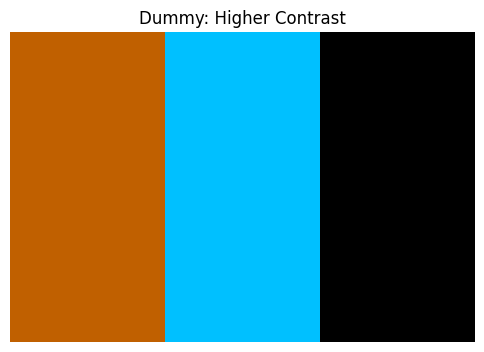

Added Gaussian Noise: mean=0, std_dev=25


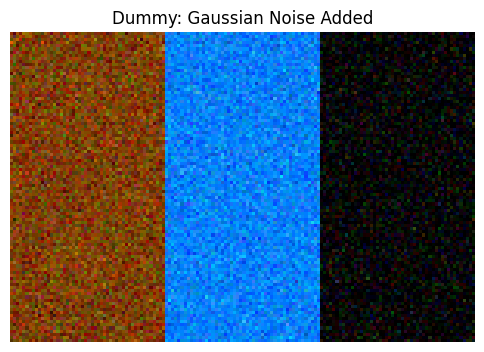

In [1]:
from helper_functions_3 import display_image
import cv2
import numpy as np


def augment_brightness_contrast(image, alpha=1.0, beta=0):
    """
    Adjusts image brightness and contrast.
    alpha: Contrast control (1.0 = no change)
    beta: Brightness control (0 = no change)
    Formula: new_image = alpha * original_image + beta
    """
    # Apply the transformation using cv2.convertScaleAbs
    # This scales, calculates absolute values, and converts back to uint8
    adjusted = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    print(f"Applied Brightness/Contrast: alpha={alpha}, beta={beta}")
    return adjusted


def augment_gaussian_noise(image, mean=0, std_dev=10):
    """
    Adds Gaussian noise to an image.
    mean: Mean of the Gaussian distribution.
    std_dev: Standard deviation of the Gaussian distribution (controls noise intensity).
    """
    # Generate Gaussian noise
    row, col, ch = image.shape
    gauss_noise = np.random.normal(mean, std_dev, (row, col, ch))

    # Add noise to the image. Need to handle potential dtype issues and clipping.
    noisy_image_float = image.astype(np.float32) + gauss_noise
    # Clip values to stay within the valid range [0, 255]
    noisy_image_clipped = np.clip(noisy_image_float, 0, 255)
    # Convert back to original dtype (usually uint8)
    noisy_image = noisy_image_clipped.astype(image.dtype)
    print(f"Added Gaussian Noise: mean={mean}, std_dev={std_dev}")
    return noisy_image


# --- Test with a sample/dummy image ---
print("\n--- Testing Augmentations on a Dummy Image ---")
# Create a simple dummy image (e.g., a colored rectangle)
dummy_image = np.zeros((100, 150, 3), dtype=np.uint8)
dummy_image[:, 50:100] = [255, 128, 0]  # Orange color in BGR
dummy_image[:, 0:50] = [0, 64, 128]  # Brownish color
display_image(dummy_image, "Original Dummy Image")

# Test Brightness/Contrast
dummy_brighter = augment_brightness_contrast(
    dummy_image, alpha=1.0, beta=50
)  # Increase brightness
display_image(dummy_brighter, "Dummy: Brighter")
dummy_contrast = augment_brightness_contrast(
    dummy_image, alpha=1.5, beta=0
)  # Increase contrast
display_image(dummy_contrast, "Dummy: Higher Contrast")

# Test Gaussian Noise
dummy_noisy = augment_gaussian_noise(dummy_image, mean=0, std_dev=25)  # Add noise
display_image(dummy_noisy, "Dummy: Gaussian Noise Added")